In [9]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
dff=pd.read_csv('atlast_data.csv',index_col=0)
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)

,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [10]:
chem=dff['pm2.5']
features=dff.drop(columns=['no2','o3','so2','co','wind','tysk','lat','lon','opady','hum','tmax','tmin','time','pm2.5'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))

x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)
#features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','lat','lon','opady','hum','tmax','tmin','time'],axis=1)

r-squered for train 0.9792208964767306
r-squered for test 0.9742698014661292
           coef       p-value
const  0.225498  6.645035e-18
pm10   0.802987  0.000000e+00


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
y_test_pred=regr.predict(X_test)
y_test_pred

array([ 9.87504533,  4.92971081,  4.99208275, 14.02015698,  6.49699025,
        4.97925069,  6.39202771,  6.46743541,  9.60330582,  7.43221804,
        6.60108948,  7.41058554,  4.70592548,  3.94011255,  9.55800075,
        5.23746637,  4.12008662, 16.0097815 ,  6.94075596, 12.1480718 ,
       13.28765381,  8.61729502,  9.10114465, 14.63696586,  4.7872563 ,
        7.12540695,  3.37711435,  9.51511762, 15.67155011,  6.32176611,
       13.93881289,  6.89931813,  7.19819412,  9.90529397,  6.8980556 ,
       15.76258602,  6.42066565, 10.04961548,  5.18961736,  7.58241212,
        6.94375887, 14.42384388,  9.48113295,  6.91199499,  8.37980514,
        4.76901726, 15.149554  ,  4.96507135,  4.91408822, 12.41833692,
        8.42077636,  8.38219645,  5.52870082,  8.15282954,  6.41360048,
       12.38913281,  2.94668995, 10.27559862,  5.59359066, 18.00344937,
        6.22858242, 15.866091  ,  6.99557977, 15.76342226,  6.06111624,
        8.24627411,  7.01208609,  4.57256751,  5.98504333,  6.05

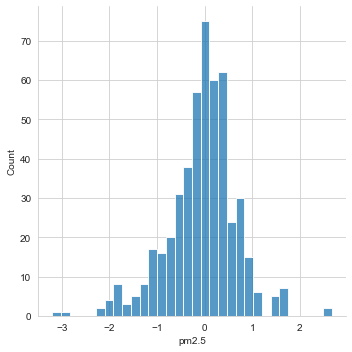

In [12]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [13]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9655126929283142, pvalue=2.0829566960145485e-09)

In [14]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 0.5244078470263382
MSE 0.5284890644590519
RMSE 0.7269725334970035


r-squered for train 0.9815691897764277
r-squered for test 0.9745941546372113
MAE 0.5241802727164221
MSE 0.5218269664688661
RMSE 0.722375917697196


ShapiroResult(statistic=0.9683430194854736, pvalue=7.07039404801435e-09)

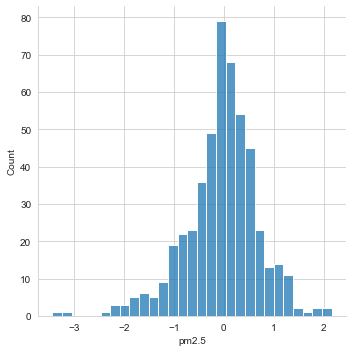

In [15]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))
scipy.stats.shapiro(y_for_gaus)